<a href="https://colab.research.google.com/github/adoraonubogu-png/Adora_INFO4670_Spring2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [2]:
# Write your code here

from google.colab import files
uploaded = files.upload()


Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

region
WestTexNewMexico       340
Albany                 338
BaltimoreWashington    338
Boise                  338
Boston                 338
Atlanta                338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
BuffaloRochester       338
LasVegas               338
LosAngeles             338
MiamiFtLauderdale      338
Louisville             338
Nashville              338
NewOrleansMobile       338
NewYork                338
Midsouth               338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

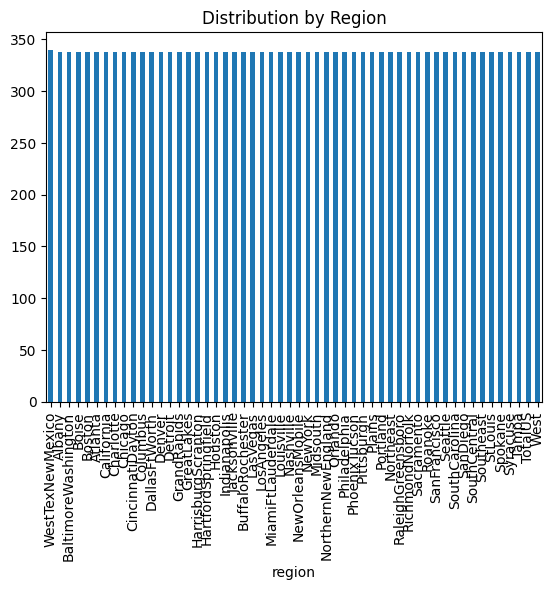

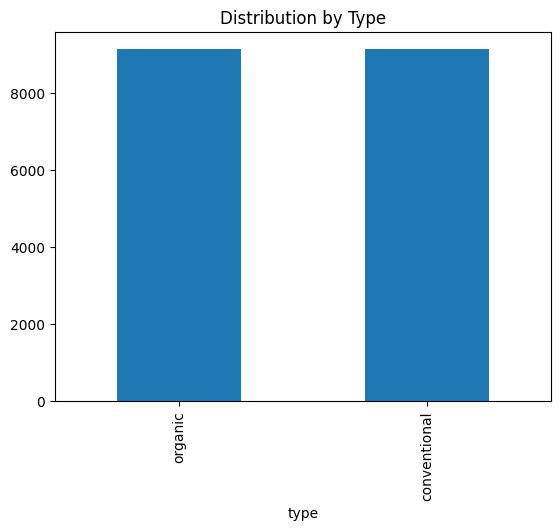

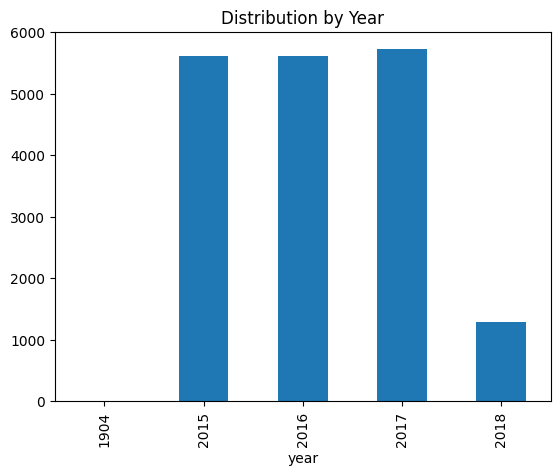

In [3]:
# Write your code here

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Assignment 2 dataset.csv")

print(df['region'].value_counts())

if 'type' in df.columns:
    print(df['type'].value_counts())

if 'year' in df.columns:
    print(df['year'].value_counts())

df['region'].value_counts().plot(kind='bar', title='Distribution by Region')
plt.show()

if 'type' in df.columns:
    df['type'].value_counts().plot(kind='bar', title='Distribution by Type')
    plt.show()

if 'year' in df.columns:
    df['year'].value_counts().sort_index().plot(kind='bar', title='Distribution by Year')
    plt.show()



**Interpretation:**

Each section seems to have equal representation and there is no clear evidence of bias in the dataset and the modeling based on this data is unlikely to be skewed.

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [4]:
# Write your code here

num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Number of duplicate rows: 2
Missing values per column:
 Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


**Explanation:**

The dataset has 2 duplicate rows, which I would to avoid biasing the analysis. Some missing values appear in a small number of columns, since the number of missing values is very small, I would them drop from the dataset.

1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [5]:
# Write your code here
print("Shape of dataset (rows, columns):", df.shape)



Shape of dataset (rows, columns): (18254, 14)


**Explanation:**

There are 18,254 rows and 14 columns I think this is a good size for training most machine learning models. There's enough samples to estimate parameters reliably and track any patterns that could come up.

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [6]:
# Write your code here

df = df.iloc[:, 1:]

if 'year' in df.columns:
    df['year'] = df['year'].astype(str)

print(df.head())


         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12-27-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12-20-2015          1.35      54876.98   674.28   44638.81   58.33   
2  12-13-2015          0.93     118220.22   794.70  109149.67  130.50   
3   12-6-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  11-29-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  


2.2 Check for duplicate values and remove them.

In [7]:
# Write your code here

num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 2


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [8]:
# Write your code here

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


In [ ]:
# Write your code here

corr = df.select_dtypes(include=['float64', 'int64']).corr()
print(corr)

              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192780 -0.208335 -0.172958 -0.179469   
Total Volume     -0.192780      1.000000  0.977863  0.974181  0.872204   
4046             -0.208335      0.977863  1.000000  0.926111  0.833390   
4225             -0.172958      0.974181  0.926111  1.000000  0.887856   
4770             -0.179469      0.872204  0.833390  0.887856  1.000000   
Total Bags       -0.177116      0.963048  0.920057  0.905789  0.792316   
Small Bags       -0.174751      0.967239  0.925281  0.916032  0.802734   
Large Bags       -0.172960      0.880641  0.838646  0.810017  0.698473   
XLarge Bags      -0.117615      0.747159  0.699379  0.688811  0.679864   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177116   -0.174751   -0.172960    -0.117615  
Total Volume    0.963048    0.967239    0.880641     0.747159  
4046            0.920057    0.925281    0.838646     0.699379  
422

**Interpretation:**

The correlation matrix shows very strong relationships between all of the volume-related variables:

Total Volume is extremely highly correlated with 4046, 4225, Total Bags, and Small Bags. The numbers represent the look-up codes for avocados meaning the correlation between them is: If sales of small and large avocados go up, Total Volume must go up.

Average Price has weak negative correlations with the volume variables which means the price tends to decrease  as volume increases, but the relationship is not strong.

The impact on model accuracy is that a lot of the features are using the same information, which can make the models untrustworthy.

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [ ]:
# Write your code here

continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


print("Continuous Variables Summary:")
print(df[continuous_cols].describe())

print("\nCategorical Variables Summary:")
print(df[categorical_cols].describe())

print("\nMedians:")
print(df[continuous_cols].median())

print("\nCategorical Variables and Unique Values:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())


Continuous Variables Summary:
           Column 1  AveragePrice  Total Volume          4046          4225  \
count  18254.000000  18254.000000  1.825300e+04  1.825200e+04  1.825300e+04   
mean      24.228060      1.406073  8.504609e+05  2.929605e+05  2.950905e+05   
std       15.480994      0.402668  3.453189e+06  1.264891e+06  1.203996e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.084277e+04  8.544900e+02  3.006890e+03   
50%       24.000000      1.370000  1.073061e+05  8.640940e+03  2.905471e+04   
75%       38.000000      1.660000  4.329238e+05  1.109857e+05  1.500448e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.825300e+04  1.825300e+04  1.825200e+04  1.825200e+04   18253.000000   
mean   2.283481e+04  2.395890e+05  1.821666e+05  5.432919e+04    3105.745759   
std    1.074528e+0

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [ ]:
# Write your code here

df['Date'] = pd.to_datetime(df['Date'])

earliest_date = df['Date'].min()
print("Earliest date:", earliest_date)

dates_up_to_2010 = df[df['Date'].dt.year <= 2010]
print("Number of records up to 2010:", dates_up_to_2010.shape[0])

#The earliest date in the dataset is 1904-01-21 and it's the only record dated before 2010.
# Due to the rest of the dataset being around 2015–2018, this entry is not reasonable and should be removed


Earliest date: 1904-01-21 00:00:00
Number of records up to 2010: 1


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
max_price = df['AveragePrice'].max()
row_max_price = df[df['AveragePrice'] == max_price]

print("Highest AveragePrice:", max_price)
print("Region with highest price:")
print(row_max_price[['region', 'AveragePrice']])


Highest AveragePrice: 3.25
Region with highest price:
             region  AveragePrice
14125  SanFrancisco          3.25


**Explanation:**

The highest value in AveragePrice is 3.25 from the San Francisco region.

I first got the maximum value of the AveragePrice column using df['AveragePrice'].max(). Next I filtered the dataset to find rows where AveragePrice equaled the maximum value.

3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
max_volume = df['Total Volume'].max()
row_max_volume = df[df['Total Volume'] == max_volume]

print("Highest Total Volume:", max_volume)
print("Region with highest volume:")
print(row_max_volume[['region', 'Total Volume']])


Highest Total Volume: 62505646.52
Region with highest volume:
       region  Total Volume
9097  TotalUS   62505646.52


**Explanation:**

The highest total volume of avocados is 9097 from the 'TotalUS' region.

I got the value by using using df['Total Volume'].max(). Then I filtered the dataset to find the row where total volume equaled the maximum value using df[df['Total Volume'] == max_volume].